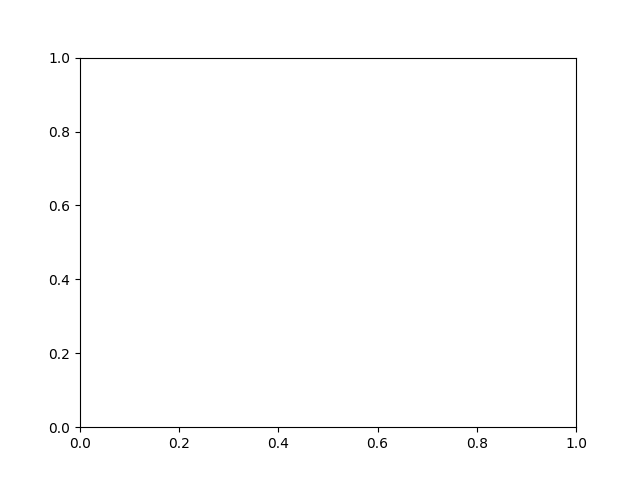

interactive(children=(FloatSlider(value=2.5000000000000004, description='cg1', max=5.0, min=0.1), FloatSlider(…

<function __main__.plot_triple_points(cg1, cg2, cl, cr, cm)>

In [11]:
%matplotlib widget

import ipywidgets as widget
import numpy as np
import matplotlib.pyplot as plt

# GLOBAL VARIABLES
N = 4
e_charge = 0.1

def get_triple_points(cg1, cg2, cl, cr, cm):
    # calculate total capacitances
    c1 = cl+cg1+cm
    c2 = cr+cg2+cm

    # calculate addition energies
    ec1 = e_charge**2/c1 * (1/(1-cm**2/(c1*c2)))
    ec2 = e_charge**2/c2 * (1/(1-cm**2/(c1*c2)))
    ecm = e_charge**2/cm * (1/(c1*c2/cm**2 - 1))

    # calculate triple points of type 1 and 2
    type1 = []
    type2 = []

    # loop over electron counts to get the points
    for A in range(0, N):
        for B in range(0, N):
            # triple point type 1
            v11 = e_charge/cg1 * (A + ec2/2 * (ec1-ecm)/(ec1*ec2-ecm**2))
            v21 = (e_charge*((B+.5)*ec2 + A*ecm) - cg1*v11*ecm)/(cg2*ec2)
            type1.append([v11,v21])
            # triple point type 2
            v12 = e_charge/cg1 * (A + ec2/2 * (ec1-ecm)/(ecm**2-ec1*ec2))
            v22 = (e_charge*(A*ecm + (B-.5)*ec2) - cg1*v12*ecm)/(cg2*ec2)
            type2.append([v12,v22])

    # return the points
    return np.array(type1).T, np.array(type2).T


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def plot_triple_points(cg1, cg2, cl, cr, cm):
    # do the calculations
    type1, type2 = get_triple_points(cg1, cg2, cl, cr, cm)
    # clear the axes
    ax.clear()
    # plot the lines

    def plot_line_between(i, j):
        ax.plot([type1[0,i], type2[0,j]], [type1[1,i], type2[1,j]], color='k', zorder=1)
        
    # this plots the shortest line between the two types of points
    for i in range((N-1)*N):
        if (i+1)%N == 0: continue # skip the top point
        plot_line_between(i, i+N+1)
    # drawing two lines up from the blue points
    for i in range(N+1, N**2):
        if i%N == 0: continue # skip points on the bottom row for now
        plot_line_between(i-N, i)
        plot_line_between(i-1, i)
    # draw lines off of the left of the graph
    for i in range(1, N):
        plot_line_between(i-1, i)
    # draw lines off of the bottom of the graph
    for i in range(N, N**2, N):
        plot_line_between(i-N, i)
    # plot the points
    ax.scatter(type1[0], type1[1], color='r', zorder=2)
    ax.scatter(type2[0], type2[1], color='b', zorder=2)
    
    ax.set_xlim(0,np.max(type1[0])-0.01)
    ax.set_ylim(0,np.max(type1[1])-0.01)
    fig.canvas.draw_idle()
plt.show()
widget.interact(plot_triple_points,
                cg1=(0.1,5,0.1),
                cg2=(0.1,5,0.1),
                cl=(0.1,2,0.1),
                cr=(0.1,2,0.1),
                cm=(0.01,20,0.1))

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot(x, f(x, A=1, B=1, C=1))

# def update(A = 1, B = 0, C = 0):
#     line.set_ydata(f(x,A,B,C))
#     fig.canvas.draw_idle()
# plot_triple_points(.5, .5, .2, .2, .3)
# plt.show()
# widget.interact(update, A = (-4,4,0.1), B = (-4,4,0.1), C = (-4,4,0.1));
